In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 01. Introduction to the dataset

**Dataset name:**  
Global Earthquake–Tsunami Risk Assessment Dataset  

**Dataset source:**  
[Kaggle](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)  

**Dataset description:**  
This dataset contains detailed information about historical earthquakes and whether an event has the potential to generate a tsunami.

**Link to Google Colab Notebook (in case folium plots do not load):**  
[Google Colab Notebook](https://colab.research.google.com/drive/1Rk1YCORiucyq2P0iGTDrL1t5LnWhp-g0#scrollTo=7toS-2RRK4Hn)


**Objectives of the analysis:**  
- Present the historical distribution of earthquakes over the years and highlight key insights.  
- Examine earthquakes characteristics and see if there are any correlations.


In [ ]:
"""
Download dataset from local files (for Google Colab)
"""
from google.colab import files
uploaded = files.upload()
!ls

Saving earthquake_data_tsunami.csv to earthquake_data_tsunami.csv
earthquake_data_tsunami.csv  sample_data


In [ ]:
earthquake_df = pd.read_csv('earthquake_data_tsunami.csv')
earthquake_df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


**Note:**  
The dataset consists mostly of numerical values describing earthquake characteristics:

* **magnitude** – the scale of the earthquake event, based on seismic waves [Richter scale].  
* **cdi** – (0–10) *Community Decimal Intensity* — represents how the earthquake was felt in an area, based on data collected from community questionnaires.  
* **mmi** – (0–12) *Modified Mercalli Intensity* — measures how the event impacted the surroundings, such as buildings and infrastructure.  
* **sig** – significance score of the event.  
* **nst** – number of seismic monitoring stations used to record the event.  
* **dmin** – distance to the nearest seismic monitoring station.  
* **gap** – angular gap between seismic stations [degrees].  
* **depth** – depth of the earthquake below the Earth's surface [kilometers].  
* **latitude** – geographical latitude of the earthquake event.  
* **longitude** – geographical longitude of the earthquake event.  

And finally, a categorical variable:  
* **tsunami** – indicates whether the earthquake had the potential to generate a tsunami [0 - no, 1 - yes]


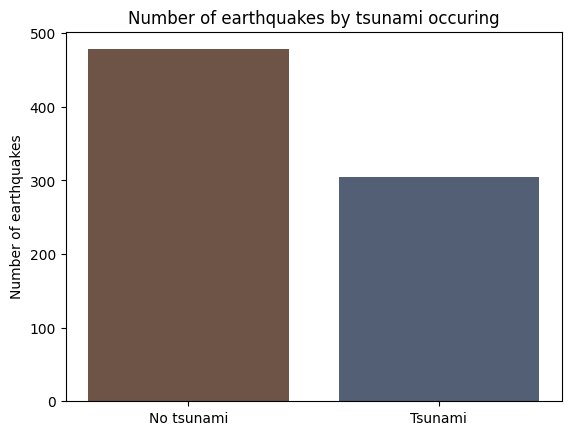

In [ ]:
tsunami_occurrences = earthquake_df['tsunami'].value_counts() #.value_counts returns series so we use index and values fields
x = tsunami_occurrences.index.map({0: "No tsunami", 1: "Tsunami"})
y = tsunami_occurrences.values
colors = ['#6e5347', '#525f75']
plt.bar(x, y, color=colors)
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes by tsunami occuring')
plt.show()

**Note:**  
The bar plot shows that most earthquakes had **no** potential to be accompanied by a tsunami. However, the difference is not very large, indicating that a big number of earthquakes were still able to cause one.

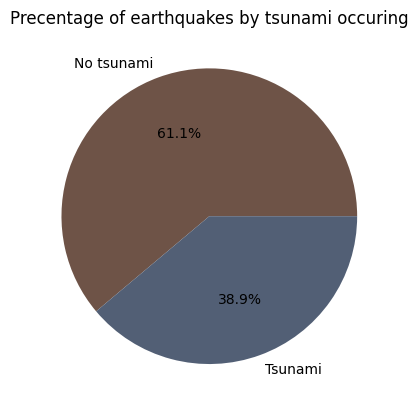

In [ ]:
plt.pie(y, labels=x, autopct='%1.1f%%', colors=colors)
plt.title('Precentage of earthquakes by tsunami occuring')
plt.show()

**Note:**  
The pie plot allows us to better visualize the ratio between the two events and provides numerical proportions - **1 in 3** earthquakes is said to be able to trigger a tsunami.

In [ ]:
numerical_vars = ['magnitude', 'cdi',	'mmi', 'sig',	'nst',	'dmin',	'gap', 'depth',	'latitude',	'longitude',	'Year',	'Month']
earthquake_df[numerical_vars].describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000


**Note:**  
Basic statistical calculations already provide some worth mentioning insights:  

* Earthquakes in the dataset have magnitudes between 6.5 and 9.1, meaning the dataset focuses only on **high-magnitude** events. However, both the mean and median are closer to the lower bound.  
* Most events have a **medium impact** based on the CDI and MMI scales.  
* Earthquake significance maximum value is almost three times higher than the values in third quartile indicating the presence of a **few standing-out events**.  
* Earthquakes dates range **from 2001 to 2022**.
* Some earthquakes were recorded with no nearby seismic stations, while others were observed by up to 934 stations - it suggest a conclusion that **some data is higher quality** than other.


In [ ]:
tsunami_df = earthquake_df[earthquake_df['tsunami'] == 1]
tsunami_df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
5,7.0,4,3,755,142,4.578,26.0,660.000,-26.0442,178.381,2022,11,1


**Note:**  
`tsunami_df` is a derived dataframe containing only the earthquakes that are said to have potentially triggered tsunamis - it will be useful for further analysis.

# 02. History of earthquakes between 2001 and 2022



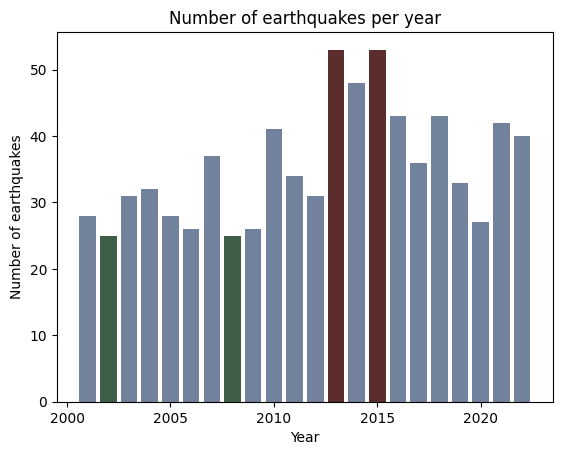

In [ ]:
years_with_counts = earthquake_df['Year'].value_counts().sort_index()
max_count = years_with_counts.max()
max_year = years_with_counts[years_with_counts == max_count]
min_count = years_with_counts.min()
min_year = years_with_counts[years_with_counts == min_count]

plt.bar(years_with_counts.index, years_with_counts.values, color='#73829c')
plt.bar(max_year.index, max_year.values, color='#5c2d2d')
plt.bar(min_year.index, min_year.values, color='#3e5e48')
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes per year')
plt.show()

In [ ]:
max_year

,count
Year,
2013,53
2015,53


In [ ]:
min_year

,count
Year,
2002,25
2008,25


**Note:**  
Years with the least earthquakes were **2002 and 2008**, each with **25** events, while years with the most earthquakes were **2013 and 2015**, with **53** events.

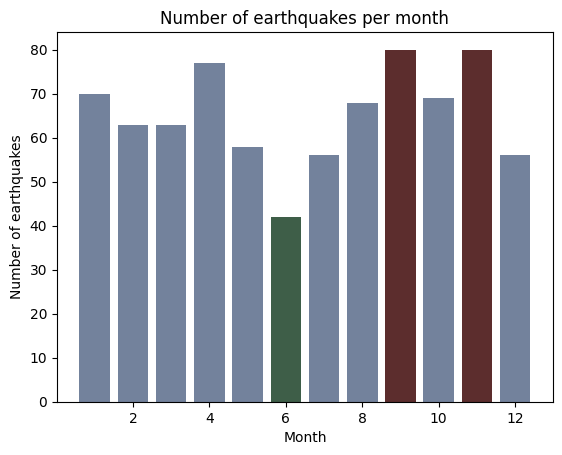

In [ ]:
months_with_counts = earthquake_df['Month'].value_counts().sort_index()
max_count = months_with_counts.max()
max_month = months_with_counts[months_with_counts == max_count]
min_count = months_with_counts.min()
min_month = months_with_counts[months_with_counts == min_count]

plt.bar(months_with_counts.index, months_with_counts.values, color='#73829c')
plt.bar(max_month.index, max_month.values, color='#5c2d2d')
plt.bar(min_month.index, min_month.values, color='#3e5e48')
plt.xlabel('Month')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes per month')
plt.show()

**Note:**  
Most earthquakes occurred in **September and November**, while the fewest occurred in **June** - the ratio is about **2:1**.

In [ ]:
starting_point = (0,0)
map = folium.Map(starting_point, zoom_start=2)
heat_info = [] # list of lists of points
for _, row in earthquake_df.iterrows():
    heat_info.append([row['latitude'], row['longitude']])

folium.plugins.HeatMap(heat_info).add_to(map)
map

**Note:** Putting earthquake points on map shows that earthquakes in the dataset mostly occur near **coastlines** — especially along the western sides of North and South America, the southern part of Asia, and the region north of Australia - these regions can be classified as the most **high-risk areas**.

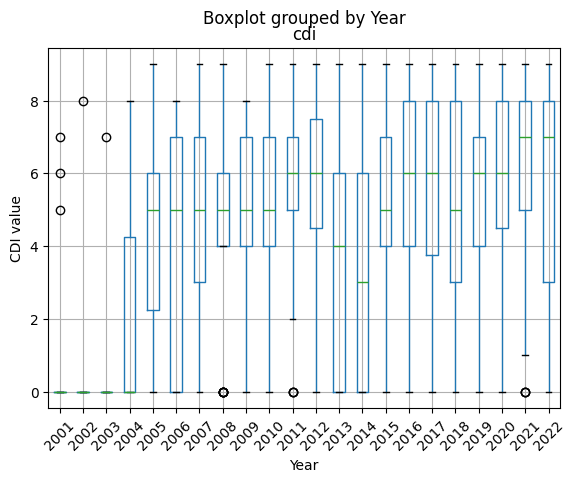

In [ ]:
earthquake_df.boxplot(column='cdi', by='Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('CDI value')
plt.show()

**Note:**  
Aggregated community questionnaires show that earthquake impacts were the lowest in the **early 2000s**, while the highest impacts were submitted in **2021**.



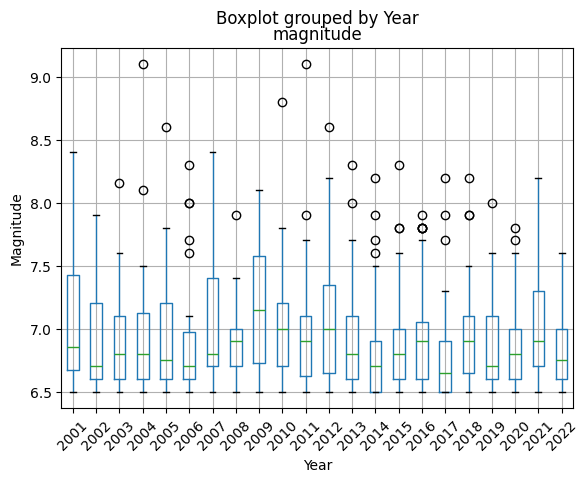

In [ ]:
earthquake_df.boxplot(column='magnitude', by='Year')
plt.xlabel('Year')
plt.xticks(rotation=45) # rotates the labels on x-axis
plt.ylabel('Magnitude')
plt.show()

Note: The magnitude of earthquakes is quite **stable** and **consistent** throughout the years — there is no noticeable trend. However, a few exceptional earthquakes with higher magnitudes can be observed, for example the ones in 2011 and 2004 with magnitude above 9.0 - let's take a closer look at them.

In [ ]:
earthquake_df['magnitude'].max()
strongest_earthquakes = earthquake_df[earthquake_df['magnitude'] == earthquake_df['magnitude'].max()]
strongest_earthquakes

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
476,9.1,9,8,2184,541,0.0,9.5,29.0,38.297,142.373,2011,3,0
668,9.1,0,8,1274,601,0.0,22.0,30.0,3.295,95.982,2004,12,0


In [ ]:
starting_point = (0,0)
map = folium.Map(starting_point, zoom_start=2)
for _, row in strongest_earthquakes.iterrows():
        folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        color='red'
    ).add_to(map)

map

**Note:**  
The highest magnitude earthquakes were found in **Japan** and **Sumatra**, highlighting these regions not only as highly prone to earthquakes in general (as also shown in the heatmap) but also as locations where the most powerful earthquakes occurred.


# 03. Earthquakes characteristics and correlations

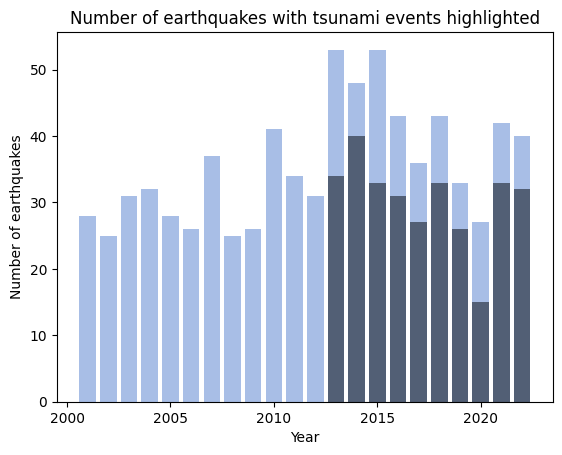

In [ ]:
tsunami_years_with_counts = tsunami_df['Year'].value_counts().sort_index()
colors = ['#a8bee6', '#525f75']
plt.bar(years_with_counts.index, years_with_counts.values, color=colors[0])
plt.bar(tsunami_years_with_counts.index, tsunami_years_with_counts.values, color=colors[1])
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes with tsunami events highlighted')
plt.show()

**Note:**  
After plotting earthquakes with tsunamis per year against all earthquakes we can see an interesting pattern — tsunamis only start appearing **after 2012**. Another thing is they are able to occur alongside the majority of these events, which is the opposite ratio od the one shown in 01. part of the notebook. The cause of this may be that the earthquakes included in the dataset before 2012 mostly had characteristics of non-tsunami events.

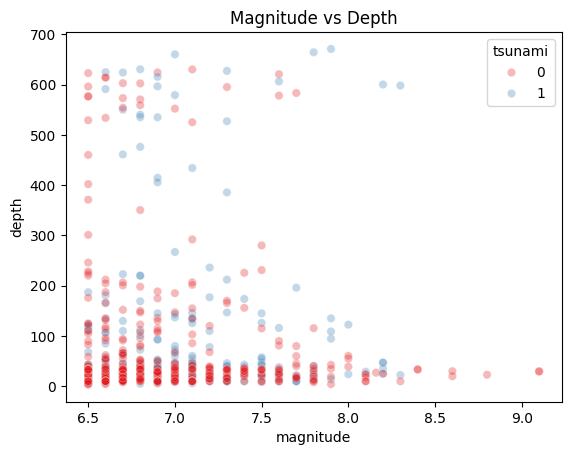

In [ ]:
sns.scatterplot(x='magnitude', y='depth', data=earthquake_df, alpha=0.3, hue='tsunami', palette='Set1')
plt.title('Magnitude vs Depth')
plt.show()

**Note:**  
There is **no** clear correlation between depth and magnitude — an earthquake can have a big depth but have a small magnitude, but it can also be shallow and hold a high magnitude value.
Also no pattern between tsunami and non-tsunami events.

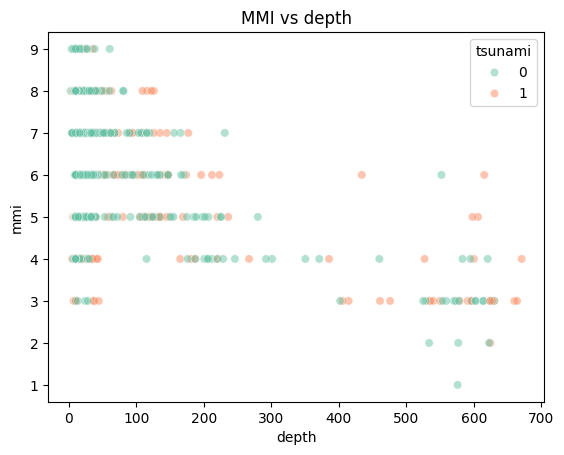

In [ ]:
sns.scatterplot(x='depth', y='mmi', data=earthquake_df, alpha=0.5, hue='tsunami', palette='Set2')
plt.title('MMI vs depth')
plt.show()

**Note:**  
Here we can see a very interesting correlation. Earthquakes with low MMI values occur at the greatest depths in the dataset. Medium MMI values are more scattered, while earthquakes with high MMI values occur at shallow depths - at the top there is not even a one exception.

This indicates that **shallower earthquakes tend to have a stronger impact on the surroundings**.

Again, no clear pattern between tsunami and non-tsunami events.


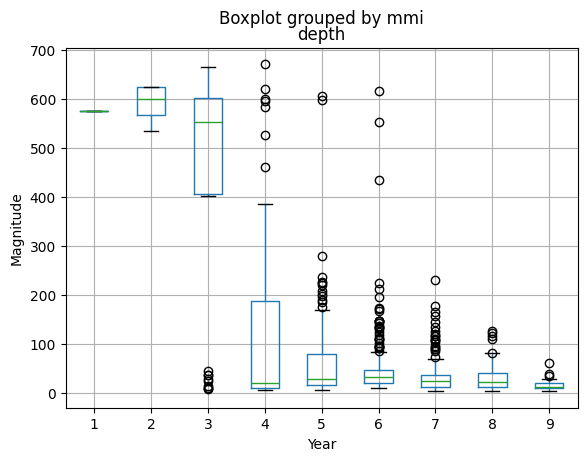

In [ ]:
earthquake_df.boxplot(column='depth', by='mmi')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()

**Note:**  
A boxplot - for better visualization of the distribution of the data.

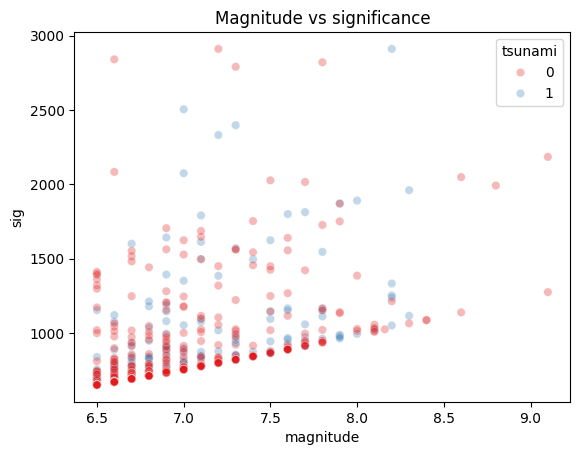

In [ ]:
sns.scatterplot(x='magnitude', y='sig', data=earthquake_df, alpha=0.3, hue='tsunami', palette='Set1')
plt.title('Magnitude vs significance')
plt.show()

**Note:**  
Here we can see a quite **linear correlation** for the lower bound — as the magnitude of the earthquake increases, the lower bound of significance also increases. This indicates that magnitude is a **major factor** when determining an event's significance, which is very intuitive. Here too, no visible tsunami correlations.

**Note based on USGS article after a bit of research after not finding tsunami correlations (https://www.usgs.gov/faqs/what-it-about-earthquake-causes-a-tsunami):**
It may seem that earthquake magnitude is not correlated with tsunami occurrence. However, this is not entirely true. The dataset only includes earthquakes with magnitudes above 6.5. According to USGS, earthquakes below this threshold are very unlikely to generate tsunamis, while those above can, though it is not guaranteed. Therefore, it is difficult to draw this insight directly from this dataset alone.

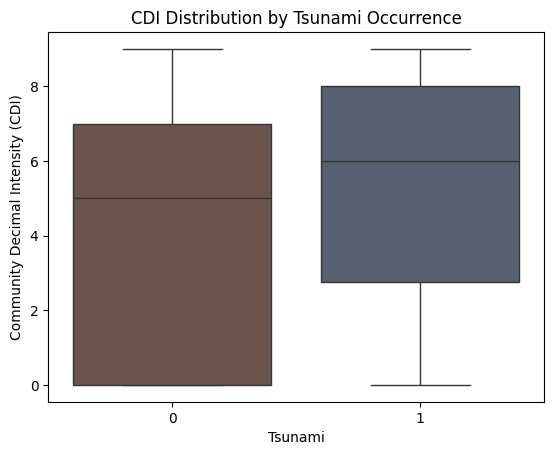

In [ ]:
colors = ['#6e5347', '#525f75']
sns.boxplot(x='tsunami', y='cdi', data=earthquake_df, palette=colors, hue='tsunami', legend=False) #hue and legend set because of a warning
plt.title('CDI Distribution by Tsunami Occurrence')
plt.ylabel('Community Decimal Intensity (CDI)')
plt.xlabel('Tsunami')
plt.show()

**Note:**  
The CDI values of tsunami-possible earthquakes are more concentrated at the higher end of the scale, meaning that these events were felt more strongly by the affected communities.


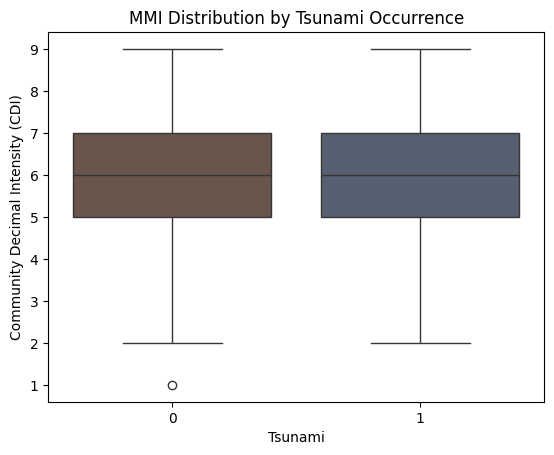

In [ ]:
sns.boxplot(x='tsunami', y='mmi', data=earthquake_df, palette=colors, hue='tsunami', legend=False)
plt.title('MMI Distribution by Tsunami Occurrence')
plt.ylabel('Community Decimal Intensity (CDI)')
plt.xlabel('Tsunami')
plt.show()

**Note:**  
The MMI values of tsunami and non-tsunami events are quite the same.

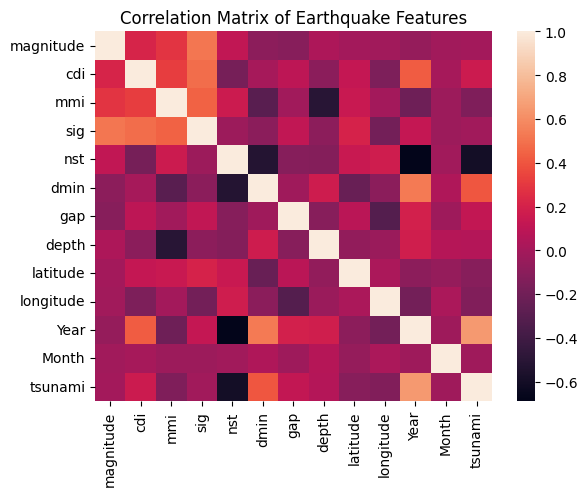

In [ ]:
sns.heatmap(earthquake_df.corr())
plt.title('Correlation Matrix of Earthquake Features')
plt.show()

**Note:**  
A heatmap can help identify correlations that might have been overlooked.  

- Significance (sig), MMI, and CDI are quite **correlated**, which makes sense because they all describe the impact of an earthquake in different ways.  
- The strongest correlation is negative correlation between the **number of stations (nst) and year** - so i will take a closer look at that.
- The previously observed relationship between **depth and MMI** is also clearly visible in the heatmap.  
- Another strong correlation exists between **the number of stations (nst) and the minimum distance to a station (dmin)** — this is intuitive because the fewer stations there are, the higher the probability that the nearest station is farther away.
- There is **no** strong correlaiton between tsunami happening and other earthquake characteristics beside year that was already explored and the number of stations that will be looked at below.

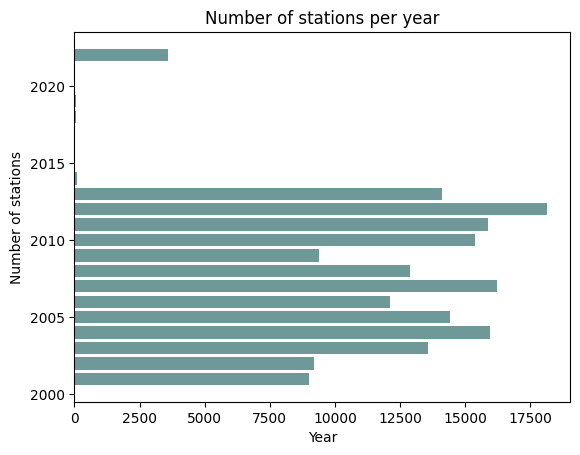

In [ ]:
years_with_nst = {}
for idx, row in earthquake_df.iterrows():
    if row['Year'] in years_with_nst:
        years_with_nst[row['Year']] += row['nst']
    else:
        years_with_nst[row['Year']] = row['nst']
plt.barh(years_with_nst.keys(), years_with_nst.values(), color='#6e9998')
plt.xlabel('Year')
plt.ylabel('Number of stations')
plt.title('Number of stations per year')
plt.show()

**Note:**  
The negative correlation between year and the number of seismic stations is visible, as more recent earthquakes in this dataset appear to have been detected by fewer stations.  
This could be due to changes in the way earthquakes are recorded or reported over the years, or simply differences in dataset coverage. However, I believe the plot below will most likely explain the primary reason (*).


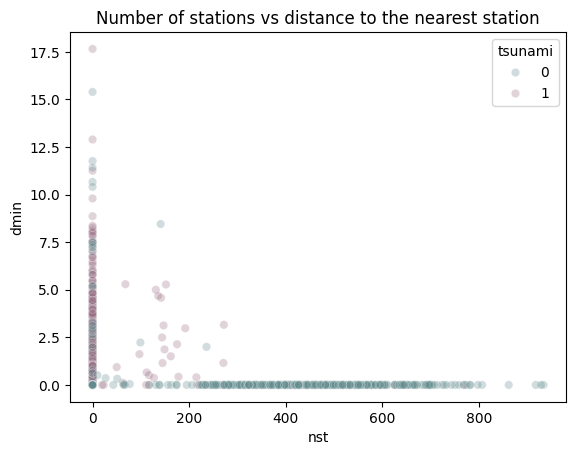

In [ ]:
colors = ['#648d8f', '#996e84']
sns.scatterplot(x='nst', y='dmin', data=earthquake_df, hue ='tsunami', alpha=0.3, palette=colors)
plt.title('Number of stations vs distance to the nearest station')
plt.show()

**Note:**  
As we can see, almost all events that were recorded with a large number of stations have a distance close to 0 and the ones with no near station had wide range of distances.

Another interesting observation is that almost all tsunami-predicted events were recorded with 0 stations in this dataset. My reasoning for this is:  
- Many tsunami-predicted events occur offshore, where most seismic stations are on land, so the nearest stations are far away.
- The tsunami-likely earthquakes included in this dataset were mostly chosen after 2012, a period when the number of recorded stations significantly dropped in the dataset.  

That explains the unintuitive (*) plot — it appears to be simply the result of the way the dataset author selected the events.


In [ ]:
starting_point = (0, 0)
map = folium.Map(location=starting_point, zoom_start=2)

for _, row in earthquake_df.iterrows():
    color = 'red' if row['tsunami'] == 1 else 'blue'
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=4,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(map)

map

**Note:**  
Here we can see where tsunami-predicted events actually occur — mostly along ocean coasts. As expected, some of them are not near any significant landmasses.

# 04. Conclusion and Further Analysis

**Note:**  
The dataset allows us to visualize the history of earthquakes quite clearly — using the year and location variables, it is easy to represent the geographical distribution of events in time.

We can also observe some interesting correlations However, it was challenging to find strong relationships between earthquake parameters, such as magnitude or depth, and tsunami occurrences. Nevertheless, some valuable insights about the selected data can be drawn.  

Furthermore, the dataset is well-suited for learning how to build predictive models, as it is clean, easy to work with, and the tsunami events are represented as binary variable.
